<a href="https://colab.research.google.com/github/diezeJhon/kaggle/blob/main/Mental-Health-Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Competition kaggle :
https://www.kaggle.com/competitions/playground-series-s4e11

- Submissions are evaluated using Accuracy Score.


In [26]:
import numpy as np
import pandas as pd
import sys
import os
# Define the base path depending on the environment
nameCompetition = "playground-series-s4e11"
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    base_path = "/content/drive/MyDrive/data/kaggle/" + nameCompetition
    print("Google Colab detected. Base path set to:", base_path)
elif "KAGGLE_KERNEL_RUN_TYPE" in os.environ:
    base_path = "/kaggle/input/" + nameCompetition
    print("Kaggle environment detected. Base path set to:", base_path)
else:
    base_path = "./data/" + nameCompetition
    print("Local environment detected. Base path set to:", base_path)
# List all files in the base path directory
if os.path.exists(base_path):
    print(f"Contents of the directory '{base_path}':")
    for dirname, _, filenames in os.walk(base_path):
        for filename in filenames:
            print(os.path.join(dirname, filename))
else:
    print(f"The directory '{base_path}' does not exist.")


Local environment detected. Base path set to: ./data/playground-series-s4e11
Contents of the directory './data/playground-series-s4e11':
./data/playground-series-s4e11/test.csv
./data/playground-series-s4e11/sample_submission.csv
./data/playground-series-s4e11/train.csv


In [27]:
df = pd.read_csv(f"{base_path}/train.csv")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140700 entries, 0 to 140699
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   id                                     140700 non-null  int64  
 1   Name                                   140700 non-null  object 
 2   Gender                                 140700 non-null  object 
 3   Age                                    140700 non-null  float64
 4   City                                   140700 non-null  object 
 5   Working Professional or Student        140700 non-null  object 
 6   Profession                             104070 non-null  object 
 7   Academic Pressure                      27897 non-null   float64
 8   Work Pressure                          112782 non-null  float64
 9   CGPA                                   27898 non-null   float64
 10  Study Satisfaction                     27897 non-null   

# EDA - Exploratory Data Analysis

## What is CGPA?

CGPA stands for Cumulative Grade Point Average. It is a grading system used in many countries (notably in India, the United States, and some European educational systems) to assess the overall academic performance of a student over a given period.

formula = Grade * credits / Total credits

In [29]:
df["CGPA"].describe()

count    27898.000000
mean         7.658636
std          1.464466
min          5.030000
25%          6.290000
50%          7.770000
75%          8.920000
max         10.000000
Name: CGPA, dtype: float64

In [30]:
(df.isna().sum() / len(df)) * 100

id                                        0.000000
Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.034115
Academic Pressure                        80.172708
Work Pressure                            19.842217
CGPA                                     80.171997
Study Satisfaction                       80.172708
Job Satisfaction                         19.836532
Sleep Duration                            0.000000
Dietary Habits                            0.002843
Degree                                    0.001421
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.002843
Family History of Mental Illness          0.000000
Depression                     

In [39]:

import seaborn as sns
df_percentage = df["Working Professional or Student"].value_counts(normalize=True) * 100
df_percentage

Working Professional or Student
Working Professional    80.169865
Student                 19.830135
Name: proportion, dtype: float64

there is 20 % of students 

<Axes: xlabel='Working Professional or Student'>

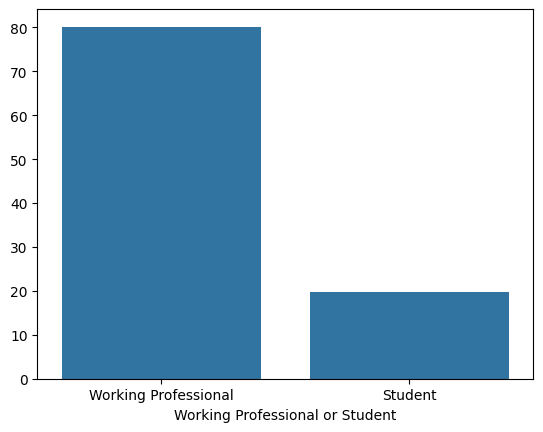

In [40]:

sns.barplot(x=df_percentage.index, y=df_percentage.values)

foreign data is due to the fact that some data are only for student or workers

# Depression 

Depression
0    115133
1     25567
Name: count, dtype: int64


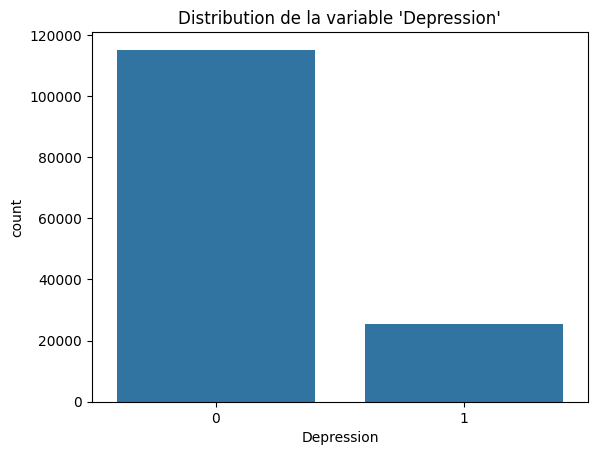

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Analyse de la variable cible
print(df['Depression'].value_counts())  # Distribution des classes
sns.countplot(x='Depression', data=df)
plt.title("Distribution de la variable 'Depression'")
plt.show()


# Corelation matrix 

<Axes: >

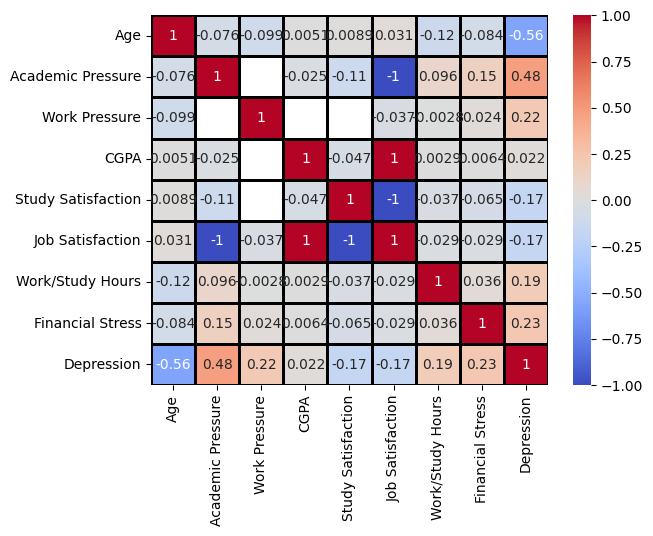

In [41]:
df_num = df.select_dtypes(include=[np.number]).drop(columns=["id"])
correlation = df_num.corr()
sns.heatmap(correlation, annot=True , cmap='coolwarm' , linewidths=1 , linecolor='black')


In [43]:
correlation

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
Age,1.000000,-0.075956,-0.098924,0.005129,0.008862,0.030793,-0.118356,-0.083589,-0.564671
Academic Pressure,-0.075956,1.000000,NaN,-0.025195,-0.112228,-1.000000,0.095650,0.152105,0.475037
Work Pressure,-0.098924,NaN,1.000000,NaN,NaN,-0.036958,-0.002808,0.024412,0.216634
CGPA,0.005129,-0.025195,NaN,1.000000,-0.047078,1.000000,0.002875,0.006398,0.021729
Study Satisfaction,0.008862,-0.112228,NaN,-0.047078,1.000000,-1.000000,-0.036934,-0.065001,-0.168014
Job Satisfaction,0.030793,-1.000000,-0.036958,1.000000,-1.000000,1.000000,-0.029227,-0.029160,-0.168543
Work/Study Hours,-0.118356,0.095650,-0.002808,0.002875,-0.036934,-0.029227,1.000000,0.036134,0.191746
Financial Stress,-0.083589,0.152105,0.024412,0.006398,-0.065001,-0.029160,0.036134,1.000000,0.227237
Depression,-0.564671,0.475037,0.216634,0.021729,-0.168014,-0.168543,0.191746,0.227237,1.000000


significant corrlation with depression : 

- Age 
- Academic pressure 

In [ ]:
df.columns

Index(['id', 'Name', 'Gender', 'Age', 'City',
       'Working Professional or Student', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

Analyse de Gender
Gender
Male      77464
Female    63236
Name: count, dtype: int64


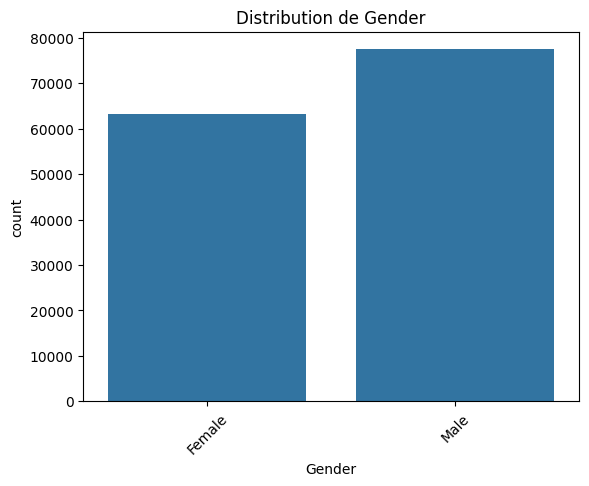

Analyse de City
City
Kalyan         6591
Patna          5924
Vasai-Virar    5765
Kolkata        5689
Ahmedabad      5613
               ... 
Pooja             1
Khushi            1
Khaziabad         1
Jhanvi            1
Unirar            1
Name: count, Length: 98, dtype: int64


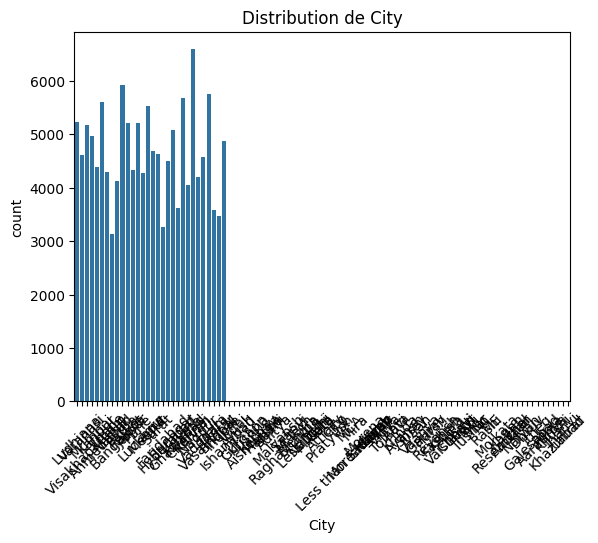

Analyse de Degree
Degree
Class 12    14729
B.Ed        11691
B.Arch       8742
B.Com        8113
B.Pharm      5856
            ...  
LCA             1
B B.Com         1
RCA             1
Mihir           1
Advait          1
Name: count, Length: 115, dtype: int64


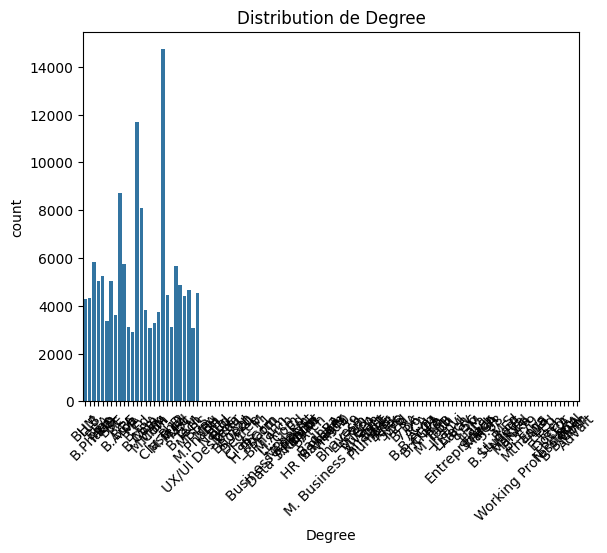

In [46]:
import matplotlib.pyplot as plt
qualitative_vars = ['Gender', 'City', 'Degree']

for var in qualitative_vars:
    print(f"Analyse de {var}")
    print(df[var].value_counts())
    sns.countplot(x=var, data=df)
    plt.title(f"Distribution de {var}")
    plt.xticks(rotation=45)
    plt.show()


Depression
0    115133
1     25567
Name: count, dtype: int64


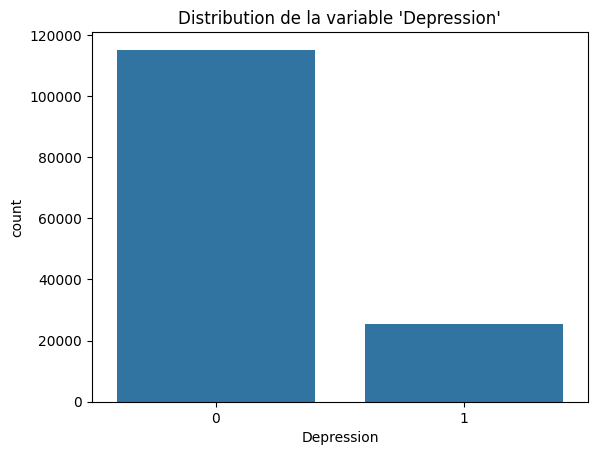